### TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Bantuan_Sosial.xlsx')

In [3]:
df.head()

,No,Wilayah Kota,Kecamatan,Kelurahan,RW,Penerima (KK),Jadwal Distribusi,Tanggal Distribusi,Sembako
0,1,JAKARTA UTARA,Penjaringan,Penjaringan,RW 01,561.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
1,2,JAKARTA UTARA,Penjaringan,Penjaringan,RW 02,529.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
2,3,JAKARTA UTARA,Penjaringan,Penjaringan,RW 03,881.0,2020-04-09,2020-04-10,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
3,4,JAKARTA UTARA,Penjaringan,Penjaringan,RW 04,369.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."
4,5,JAKARTA UTARA,Penjaringan,Penjaringan,RW 05,244.0,2020-04-09,2020-04-09,"beras 5kg, biskuit 2 pc, masker 2pc, sabun 2pc..."


In [4]:
# Melakukan cleansing data
# Dikarenakan pada kolom ini hanya memiliki 1 missing value, 
#maka digunakan cleaning data menggunakan mode.

val = df['Jadwal Distribusi'].mode().values[0]
df['Jadwal Distribusi'] = df['Jadwal Distribusi'].fillna(val)

In [5]:
# Cleansing data kolom tanggal distribusi

median_value = df['Tanggal Distribusi'].median()
df['Tanggal Distribusi'] = df['Tanggal Distribusi'].fillna(val)

In [6]:
# Menampilkan jumlah missing value dari kolom Tanggal Distribusi yang sudah 0

df.isna().sum()

No                    0
Wilayah Kota          0
Kecamatan             0
Kelurahan             0
RW                    0
Penerima (KK)         0
Jadwal Distribusi     0
Tanggal Distribusi    0
Sembako               0
dtype: int64

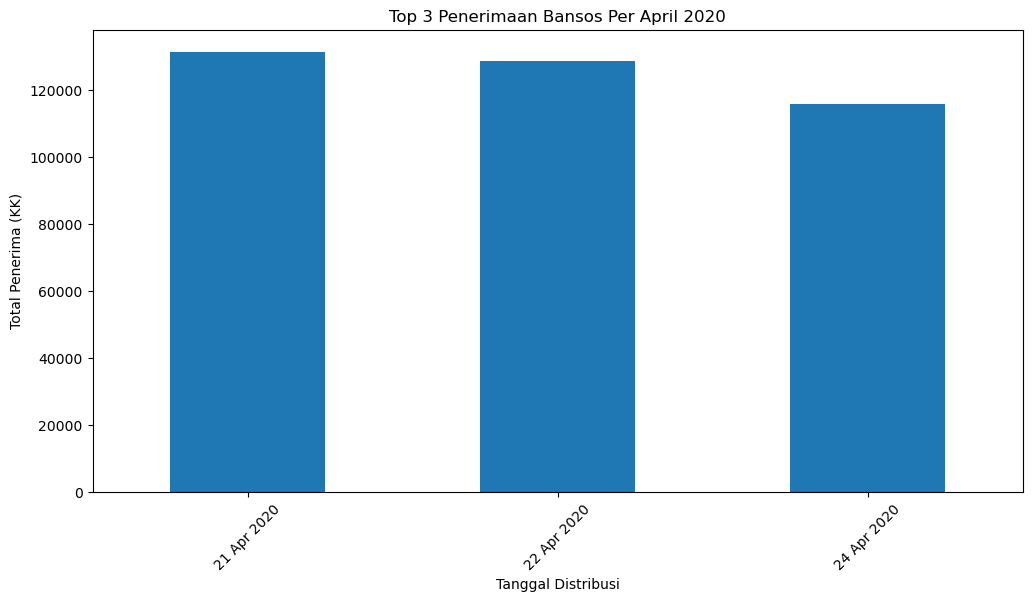

In [7]:
# Mengubah kolom 'Tanggal Distribusi' menjadi tipe data datetime jika belum
df['Tanggal Distribusi'] = pd.to_datetime(df['Tanggal Distribusi'])

# Ekstraksi bulan dan tahun dari kolom 'Tanggal Distribusi'
df['Bulan_Tahun'] = df['Tanggal Distribusi'].dt.strftime('%d %b %Y')

# Menghitung total penerima (KK) per bulan dan tahun
total_distribusi_bulan_tahun = df.groupby('Bulan_Tahun')['Penerima (KK)'].sum()

# Mengurutkan total penerima (KK) per bulan dan tahun dari nilai tertinggi
total_distribusi_bulan_tahun = total_distribusi_bulan_tahun.sort_values(ascending=False)

# Mengambil 3 bulan dan tahun teratas
top_3_distribusi = total_distribusi_bulan_tahun.head(3)

# Membuat visualisasi bar plot
plt.figure(figsize=(12, 6))
ax = top_3_distribusi.plot(kind='bar')
plt.title('Top 3 Penerimaan Bansos Per April 2020')
plt.xlabel('Tanggal Distribusi')
plt.ylabel('Total Penerima (KK)')
plt.xticks(rotation=45)
plt.show()

Based on the Histogram Diagram above, we are looking for the Top 3 Dates of social assistance distribution in the DKI Jakarta area with a total number of recipients per KK of 1,160,409. It can be seen that in the first place the largest distribution occurred on 04/21/2020 with a total of 131,264 (11.3%). Then in second place occurred on 04/22/2020 with a total of 128,513 (11%) and in last place occurred on 04/24/2020 with a total of 115,748 (9.9%).

### TASK 2

In [8]:
df = pd.read_csv('data_balita.csv')

In [9]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_balita_stunting,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,40314,ORANG,2014
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,25332,ORANG,2014
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,26687,ORANG,2014
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,46412,ORANG,2014
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,14609,ORANG,2014


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      243 non-null    int64 
 1   kode_provinsi           243 non-null    int64 
 2   nama_provinsi           243 non-null    object
 3   kode_kabupaten_kota     243 non-null    int64 
 4   nama_kabupaten_kota     243 non-null    object
 5   jumlah_balita_stunting  243 non-null    int64 
 6   satuan                  243 non-null    object
 7   tahun                   243 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 15.3+ KB


In [11]:
#  grafik batang berdasarkan tahun dan jumlah balita stunting
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df, x='tahun', y='jumlah_balita_stunting')
# plt.title('Jumlah Balita Stunting berdasarkan Tahun')
# plt.xlabel('Tahun')
# plt.ylabel('Jumlah Balita Stunting')
# plt.show()

In [12]:
# Mengelompokkan data berdasarkan nama_kabupaten_kota dan menghitung jumlah balita stunting
total_stunting_per_kabupaten = df.groupby('nama_kabupaten_kota')['jumlah_balita_stunting'].sum()

# Menampilkan hasil
print(total_stunting_per_kabupaten)

nama_kabupaten_kota
KABUPATEN BANDUNG          206744
KABUPATEN BANDUNG BARAT    110395
KABUPATEN BEKASI            94384
KABUPATEN BOGOR            239791
KABUPATEN CIAMIS            37052
KABUPATEN CIANJUR          159116
KABUPATEN CIREBON          162912
KABUPATEN GARUT            127064
KABUPATEN INDRAMAYU        126893
KABUPATEN KARAWANG         122824
KABUPATEN KUNINGAN          48053
KABUPATEN MAJALENGKA        37711
KABUPATEN PANGANDARAN       26689
KABUPATEN PURWAKARTA        51174
KABUPATEN SUBANG            30965
KABUPATEN SUKABUMI         161930
KABUPATEN SUMEDANG          59189
KABUPATEN TASIKMALAYA      166484
KOTA BANDUNG                57547
KOTA BANJAR                  9190
KOTA BEKASI                102163
KOTA BOGOR                  36356
KOTA CIMAHI                 40439
KOTA CIREBON                58674
KOTA DEPOK                  53962
KOTA SUKABUMI               37018
KOTA TASIKMALAYA            45632
Name: jumlah_balita_stunting, dtype: int64


In [13]:
# Mengurutkan total balita stunting per kabupaten dalam urutan menurun
top_5_kabupaten_stunting = total_stunting_per_kabupaten.sort_values(ascending=False).head(5)

# Menampilkan 5 kabupaten tertinggi balita stunting
print(top_5_kabupaten_stunting)

nama_kabupaten_kota
KABUPATEN BOGOR          239791
KABUPATEN BANDUNG        206744
KABUPATEN TASIKMALAYA    166484
KABUPATEN CIREBON        162912
KABUPATEN SUKABUMI       161930
Name: jumlah_balita_stunting, dtype: int64


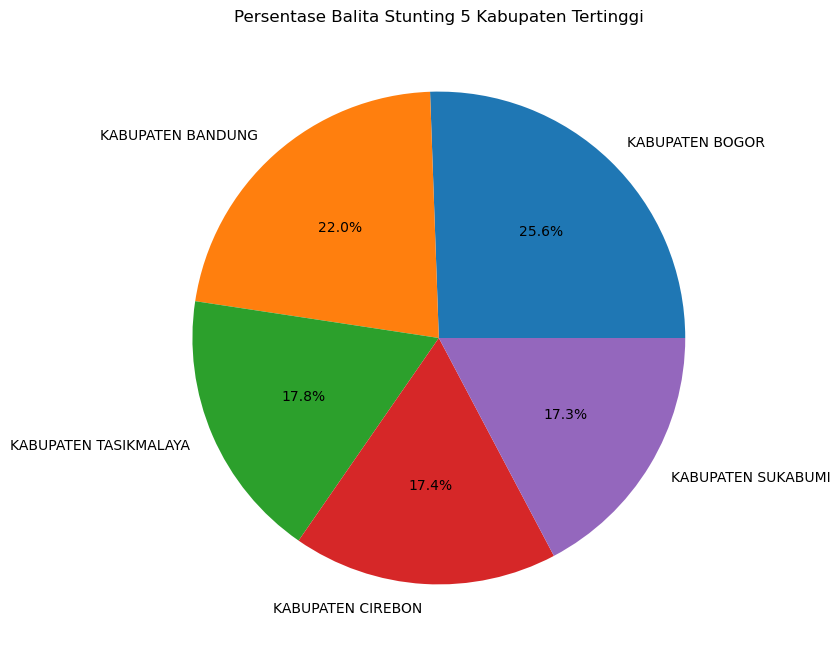

In [14]:
import matplotlib.pyplot as plt

# Ambil data 5 kabupaten teratas
top_5_kabupaten_stunting = total_stunting_per_kabupaten.sort_values(ascending=False).head(5)

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_kabupaten_stunting, labels=top_5_kabupaten_stunting.index, autopct='%1.1f%%')
plt.title('Persentase Balita Stunting 5 Kabupaten Tertinggi')
plt.show()

Based on the pie chart above, insight was conducted to see the 5 districts with the highest number of stunted children under five in West Java with a total of 2,410,351. In the first place is in Bogor Regency with 239,791 (25, 6%), then in the second place is in Bandung Regency with a total of 206,744 (22%), then there is Tasikmalaya Regency with 166,484 (17, 8%) then there is Cirebon Regency 162,912 (17, 4%) and Sukabumi Regency with 161,930 (17, 3%). With these data, it is necessary to review Posyandu in the relevant areas to find out what causes high stunting in toddlers and find solutions to reduce the number of stunting in the relevant areas.